# HR Analytics Attrition classification

# 1. Problem definition

>  We have the dataset of people analytics lets predict their attrition(Binary Classification)

# 2. Data

The dataset was downloaded from :- https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics
* It has `1470` entries
* `34` features

# 3.Evaluation
> if our model achieve the accuracy above `80` we will continue with this project

# 4. Features
 * 1. Age (Age of the employee)
 * 2. Attrition(yes or no)
 * 3. BusinessTravel (categorical)
 * 4. DailyRate (The amount of money paid per day)
 * 5. Department (categorical)
 * 6. DistanceFromHome(numerical)
 * 7. Education(Categorical)
 * 8. EducationField(categorical)
 * 9. EmployeeCount(Numerical)
 * 10.EmployeeNumber(Numerical)
 * 11.EnvironmentSatisfaction(categorical)
 * 12.Gender(male/female)
 * 13.HourlyRate(The amount earned per hour)
 * 14.JobInvolvement(categorical)
 * 15.JobLevel(cateegorical)
 * 16.JobRole(Post of the employee)
 * 17.JobSatisfaction(categorical)
 * 18.MaritalStatus(single/married)
 * 19.MonthlyIncome(Numerical)
 * 20.MonthlyRate(Monthly earnings)
 * 21.NumCompaniesWorked(Numerical)
 * 22.Over18(y/N)
 * 23.OverTime(Yes/No)
 * 24.PercentSalaryHike(Numericaal)
 * 25.PerformanceRating(categorical)
 * 26.RelationshipSatisfaction(categorical)
 * 27.StandardHours(Numerical)
 * 28.StockOptionLevel(categorical)
 * 29.TotalWorkingYears(Numerical)
 * 30.TrainingTimesLastYear(Numerical) 
 * 31.WorkLifeBalance(categorical)
 * 32.YearsAtCompany (Numerical)
 * 33.YearsInCurrentRole(Numerical)
 * 34.YearsSinceLastPromotion(Numerical)
 * 35.YearsWithCurrManager(Numerical)
 
 > Attrition is the dependent variable(target variable),  
 > Other features are independent variables

# Preparing the tools

In [1]:
#lets import the visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

#lets import the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#lets import the metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score

#lets filter the warnings
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [2]:
pd.set_option('display.max_columns', 0)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#lets check for the missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

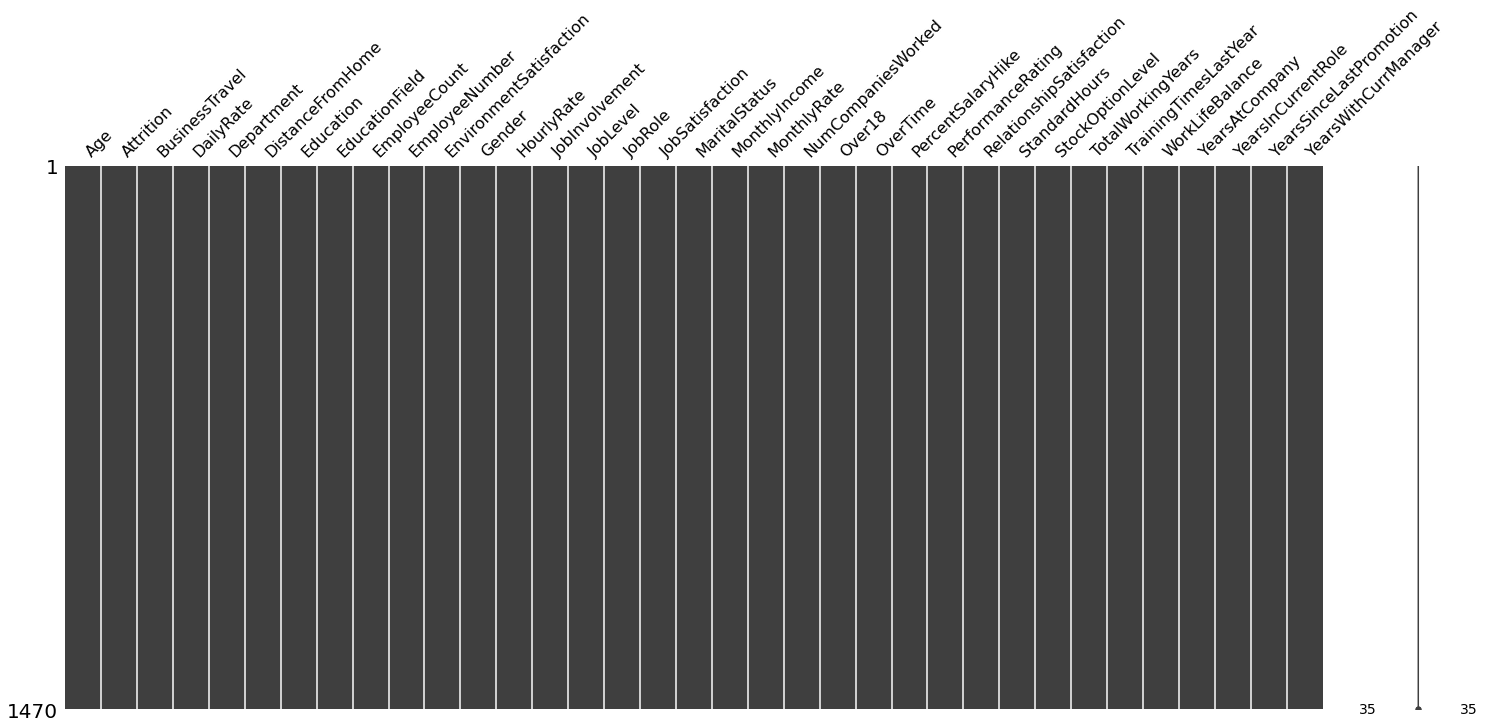

In [5]:
missingno.matrix(df);

* There are no missing values in this dataset

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* we can see that we dont have much outliers here

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
#lets remove the features with single variables
df.drop(['EmployeeCount', 'Over18','StandardHours'], axis = 1, inplace = True)

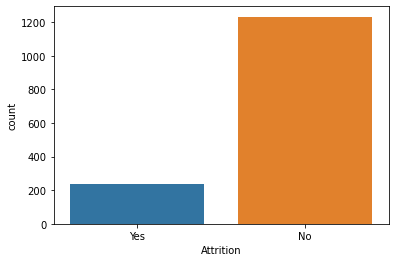

In [9]:
sns.countplot(df['Attrition']);

In [10]:
df.Attrition = df.Attrition.astype('category')
df.Attrition = df.Attrition.cat.codes

In [11]:
Attrition = df[(df['Attrition']!= 0)]

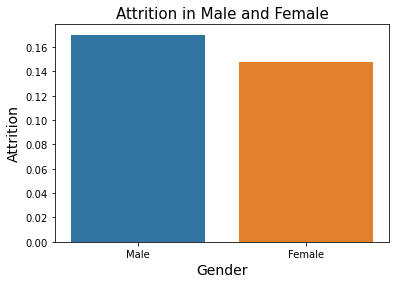

In [12]:
Gender_diff = df[['Gender', 'Attrition']].groupby('Gender', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(Gender_diff['Gender'], Gender_diff['Attrition'])
plt.title('Attrition in Male and Female', fontsize = 15)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

* `Male` has more number of attrition the `Female`

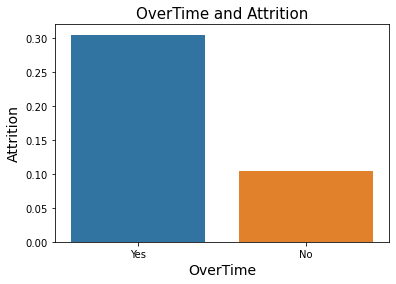

In [13]:
over_diff = df[['OverTime', 'Attrition']].groupby('OverTime', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(over_diff['OverTime'], over_diff['Attrition'])
plt.title('OverTime and Attrition', fontsize = 15)
plt.xlabel('OverTime', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

* People working overtime have higher attrition rate

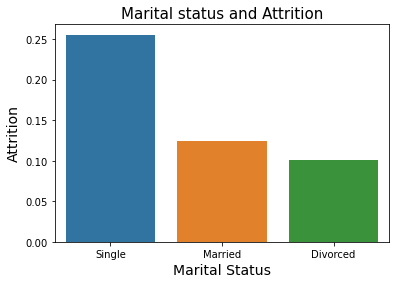

In [14]:
marital_diff = df[['MaritalStatus', 'Attrition']].groupby('MaritalStatus', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(marital_diff['MaritalStatus'], marital_diff['Attrition'])
plt.title('Marital status and Attrition', fontsize = 15)
plt.xlabel('Marital Status', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

* People with marital status as single has more chances of attrition

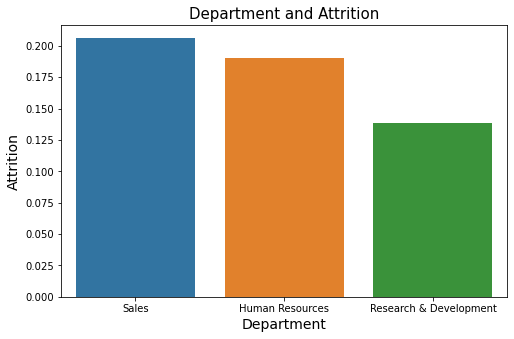

In [15]:
fig, ax = plt.subplots(figsize = (8, 5))
Department_diff = df[['Department', 'Attrition']].groupby('Department', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(Department_diff['Department'], Department_diff['Attrition'])
plt.title('Department and Attrition', fontsize = 15)
plt.xlabel('Department', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

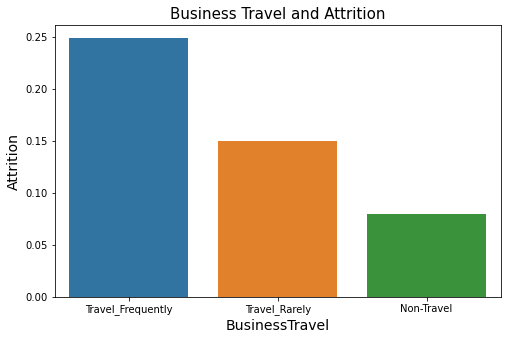

In [16]:
fig, ax = plt.subplots(figsize = (8, 5))
BusinessTravel_diff = df[['BusinessTravel', 'Attrition']].groupby('BusinessTravel', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(BusinessTravel_diff['BusinessTravel'], BusinessTravel_diff['Attrition'])
plt.title('Business Travel and Attrition', fontsize = 15)
plt.xlabel('BusinessTravel', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

* People who are travelling frequently has more number of attrition

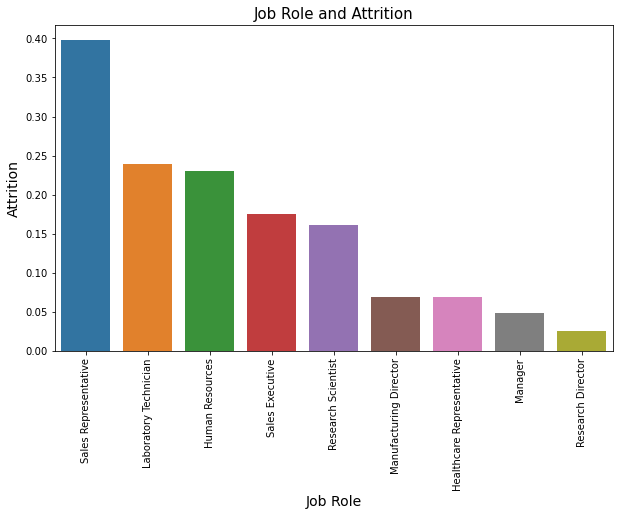

In [17]:
fig, ax = plt.subplots(figsize = (10, 6))
JobRole_diff = df[['JobRole', 'Attrition']].groupby('JobRole', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(JobRole_diff['JobRole'], JobRole_diff['Attrition'])
plt.title('Job Role and Attrition', fontsize = 15)
plt.xlabel('Job Role', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)
plt.xticks(rotation = 90);

* People with the job role of `Sale Representative` has more number of attrition

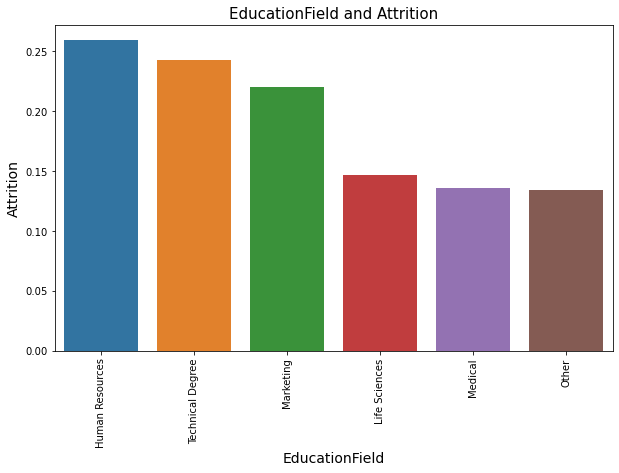

In [18]:
fig, ax = plt.subplots(figsize = (10, 6))
EducationField_diff = df[['EducationField', 'Attrition']].groupby('EducationField', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(EducationField_diff['EducationField'], EducationField_diff['Attrition'])
plt.title('EducationField and Attrition', fontsize = 15)
plt.xlabel('EducationField', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)
plt.xticks(rotation = 90);

* People with education field has `Human resources` has more number of attrition

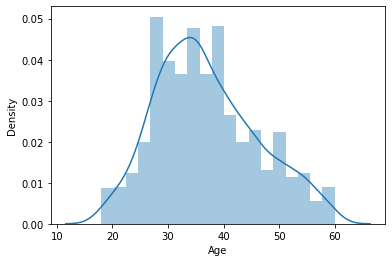

In [19]:
#lets check the distribution of the age feature
sns.distplot(df['Age']);

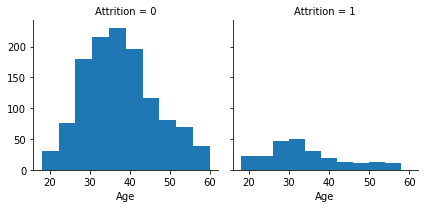

In [20]:
f = sns.FacetGrid(df, col = 'Attrition')
f.map(plt.hist, 'Age');

* People with age of `28` to `35` have more attrition rate 

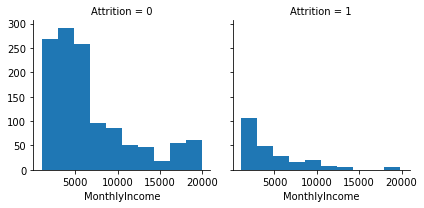

In [21]:
g = sns.FacetGrid(df, col = 'Attrition')
g.map(plt.hist, 'MonthlyIncome');

* People with the monthly income less than 5000 are more likely to have attrition

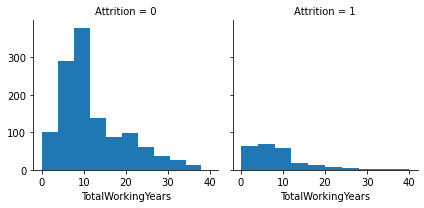

In [22]:
y = sns.FacetGrid(df, col = 'Attrition')
y.map(plt.hist, 'TotalWorkingYears');

* People with the working years less than 10 years has higher attrition rate

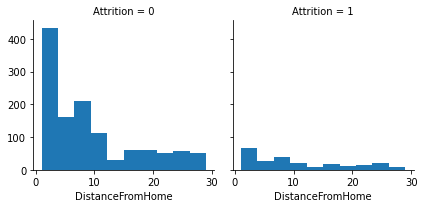

In [23]:
d = sns.FacetGrid(df, col = 'Attrition')
d.map(plt.hist, 'DistanceFromHome');

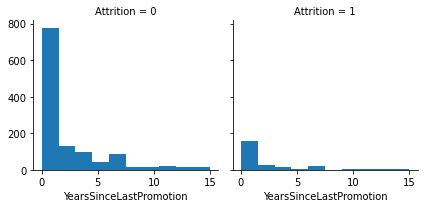

In [24]:
p = sns.FacetGrid(df, col = 'Attrition')
p.map(plt.hist, 'YearsSinceLastPromotion');

* people with less than 5 years from their last promotion have more attrition rate

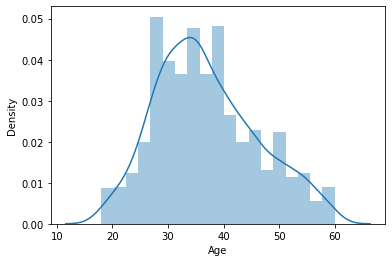

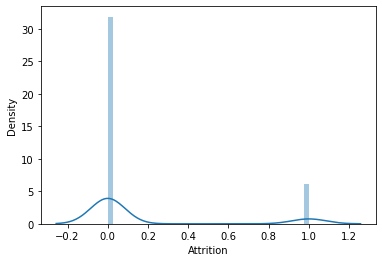

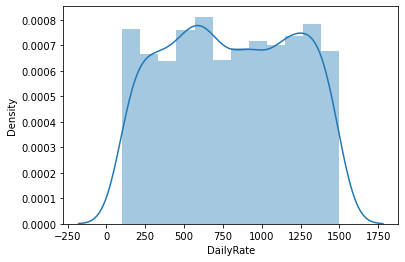

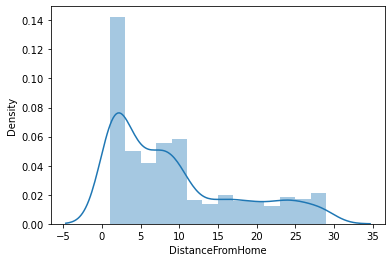

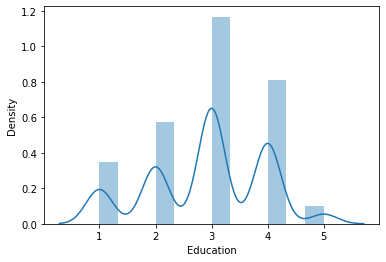

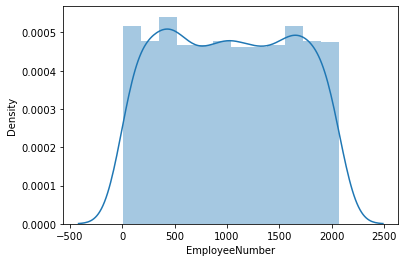

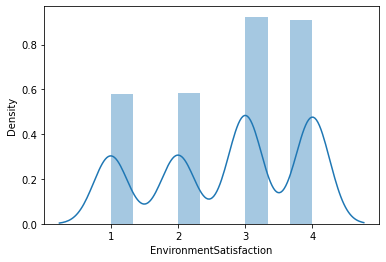

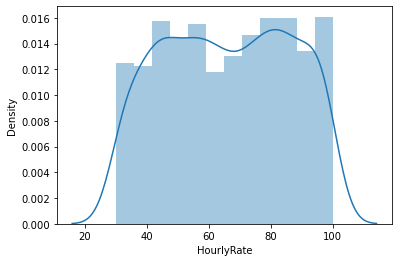

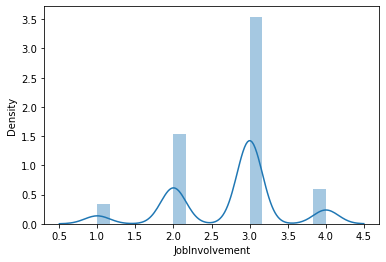

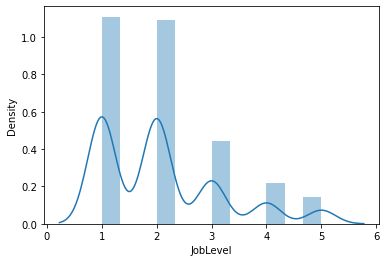

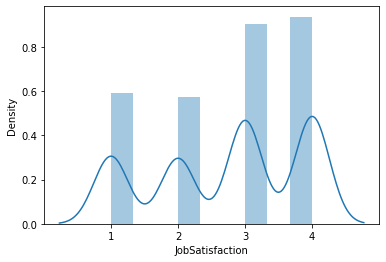

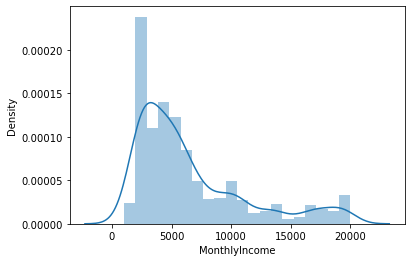

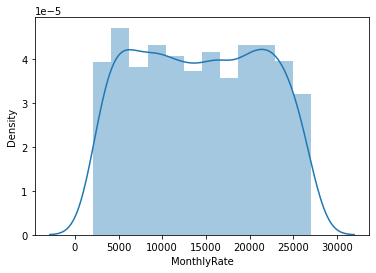

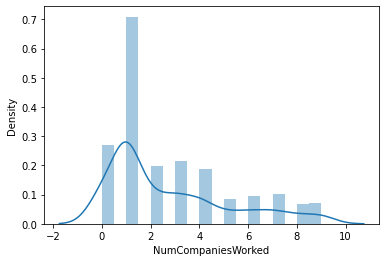

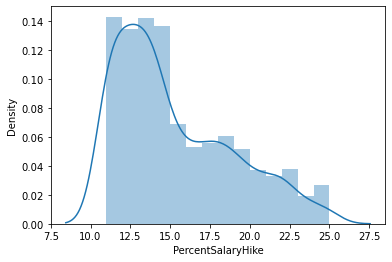

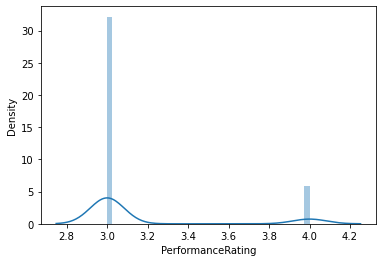

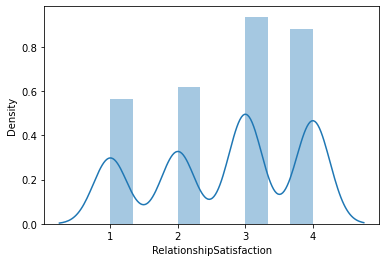

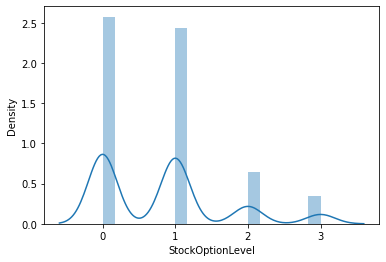

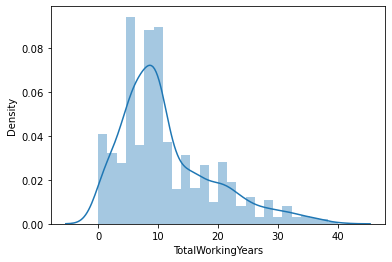

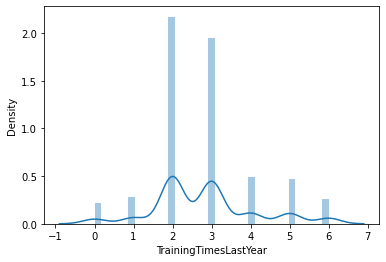

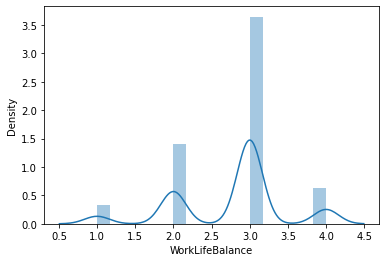

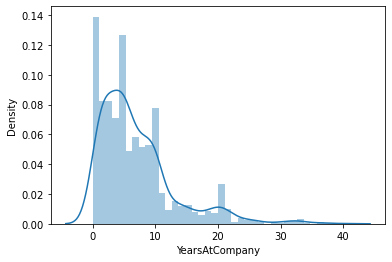

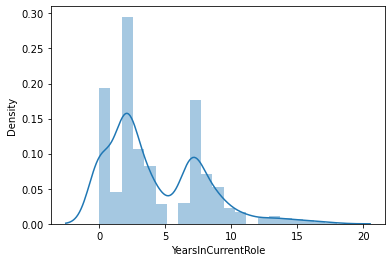

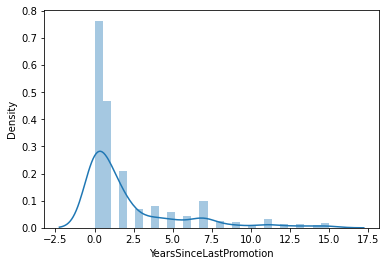

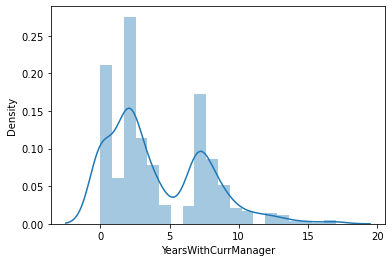

In [25]:
for cols in df.columns:
    if pd.api.types.is_numeric_dtype(df[cols]):
        sns.distplot(df[cols])
        plt.show()

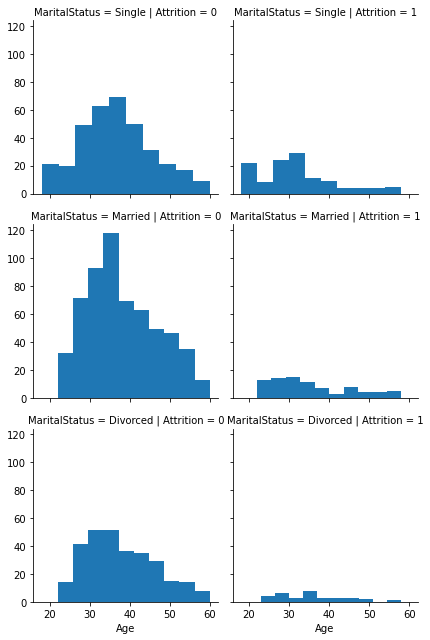

In [26]:
m = sns.FacetGrid(df, col = 'Attrition', row = 'MaritalStatus')
m.map(plt.hist, 'Age');

* People with the marital status `Single` and age between `28` to `35` has more attrition rate

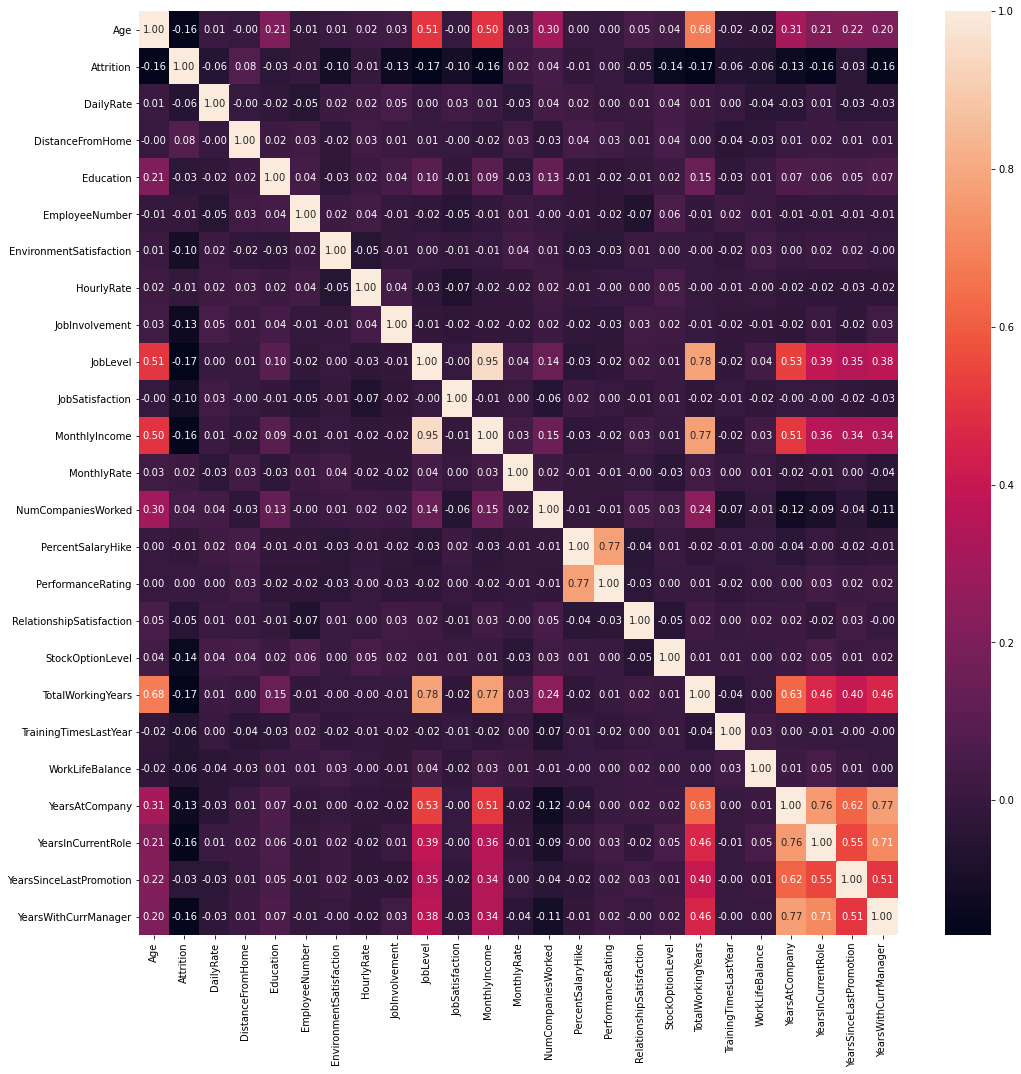

In [27]:
#lets plot correlation
fig, ax = plt.subplots(figsize = (17, 17))
sns.heatmap(df.corr(),
           annot = True,
           fmt = '.2f');

In [28]:
#lets convert the dtype of columns to integer
le = LabelEncoder()
for cols in df.columns:
    if pd.api.types.is_object_dtype(df[cols]):
        df[cols] = df[cols].astype('category')
        df[cols] = le.fit_transform(df[cols])
        

## Treating the outliers

In [29]:
from scipy.stats import zscore
zscore = abs(zscore(df))
print(df.shape)
df_new = df.loc[(zscore<3).all(axis = 1)]
print(df_new.shape)

(1470, 32)
(1387, 32)


In [30]:
# lets check for the skewness
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [37]:
Target = df_new['Attrition']

In [32]:
df_ = df_new.drop('Attrition', axis = 1)

## Treating the skewnewss with log method

In [33]:
for cols in df_.columns:
    if df_.skew().loc[cols] > 0.55:
        df_[cols] = np.log1p(df_[cols])

In [34]:
df_.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                    0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
Y

* we have done a log transformation here

In [35]:
#lets drop these features
df_.drop([ 'EmployeeNumber'], axis = 1, inplace = True)

In [38]:
# lets split the data
X = df_
y = Target

#lets normalize the data
sd = StandardScaler()
X_new = sd.fit_transform(X)

#lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                   y,
                                                   test_size = 0.2)

In [39]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy_score : ',accuracy_score(y_test, y_pred))
    print('F1_score :',f1_score(y_test, y_pred))
    print('Precision_score :',precision_score(y_test, y_pred))
    print('Recall_score :', recall_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')

LogisticRegression()
Accuracy_score :  0.8669064748201439
F1_score : 0.47887323943661975
Precision_score : 0.7727272727272727
Recall_score : 0.3469387755102041
[[224   5]
 [ 32  17]]


SVC()
Accuracy_score :  0.8489208633093526
F1_score : 0.34375
Precision_score : 0.7333333333333333
Recall_score : 0.22448979591836735
[[225   4]
 [ 38  11]]


DecisionTreeClassifier()
Accuracy_score :  0.7661870503597122
F1_score : 0.32989690721649484
Precision_score : 0.3333333333333333
Recall_score : 0.32653061224489793
[[197  32]
 [ 33  16]]


KNeighborsClassifier()
Accuracy_score :  0.8345323741007195
F1_score : 0.17857142857142858
Precision_score : 0.7142857142857143
Recall_score : 0.10204081632653061
[[227   2]
 [ 44   5]]




## Ensemble technique

In [40]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)
pred_rf = Rf.predict(X_test)
print('Accuracy_score :', accuracy_score(y_test, pred_rf))
confusion_matrix(y_test, pred_rf)

Accuracy_score : 0.8525179856115108


array([[227,   2],
       [ 39,  10]], dtype=int64)

## Boosting technique

In [41]:
Adb = AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators = 50)
Adb.fit(X_train, y_train)
pred_adb = Adb.predict(X_test)
print('Accuracy_score :', accuracy_score(y_test, pred_adb))
confusion_matrix(y_test, pred_adb)

Accuracy_score : 0.8597122302158273


array([[223,   6],
       [ 33,  16]], dtype=int64)

> As this is imbalanced dataset lets try to do oversampling in it

##  OverSampling

In [42]:
os = RandomOverSampler(0.5)
X_train_os, y_train_os = os.fit_sample(X_train, y_train)

In [43]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
for model in models:
    model.fit(X_train_os, y_train_os)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy_score : ',accuracy_score(y_test, y_pred))
    print('F1_score :',f1_score(y_test, y_pred))
    print('Precision_score :',precision_score(y_test, y_pred))
    print('Recall_score :', recall_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')

LogisticRegression()
Accuracy_score :  0.8273381294964028
F1_score : 0.5294117647058822
Precision_score : 0.5094339622641509
Recall_score : 0.5510204081632653
[[203  26]
 [ 22  27]]


SVC()
Accuracy_score :  0.8633093525179856
F1_score : 0.5
Precision_score : 0.7037037037037037
Recall_score : 0.3877551020408163
[[221   8]
 [ 30  19]]


DecisionTreeClassifier()
Accuracy_score :  0.7589928057553957
F1_score : 0.26373626373626374
Precision_score : 0.2857142857142857
Recall_score : 0.24489795918367346
[[199  30]
 [ 37  12]]


KNeighborsClassifier()
Accuracy_score :  0.7769784172661871
F1_score : 0.4038461538461538
Precision_score : 0.38181818181818183
Recall_score : 0.42857142857142855
[[195  34]
 [ 28  21]]




In [44]:
Adb = AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators = 50)
Adb.fit(X_train_os, y_train_os)
pred_adb = Adb.predict(X_test)
print('Accuracy_score :', accuracy_score(y_test, pred_adb))
confusion_matrix(y_test, pred_adb)

Accuracy_score : 0.8129496402877698


array([[200,  29],
       [ 23,  26]], dtype=int64)

In [45]:
Rf = RandomForestClassifier()
Rf.fit(X_train_os,y_train_os)
pred_rf = Rf.predict(X_test)
print('Accuracy_score :', accuracy_score(y_test, pred_rf))
confusion_matrix(y_test, pred_rf)

Accuracy_score : 0.8345323741007195


array([[223,   6],
       [ 40,   9]], dtype=int64)

## SMOTETomek

In [46]:

from imblearn.combine import SMOTETomek
sm = SMOTETomek(0.5)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [47]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
for model in models:
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy_score : ',accuracy_score(y_test, y_pred))
    print('F1_score :',f1_score(y_test, y_pred))
    print('Precision_score :',precision_score(y_test, y_pred))
    print('Recall_score :', recall_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')

LogisticRegression()
Accuracy_score :  0.8201438848920863
F1_score : 0.5192307692307692
Precision_score : 0.4909090909090909
Recall_score : 0.5510204081632653
[[201  28]
 [ 22  27]]


SVC()
Accuracy_score :  0.8453237410071942
F1_score : 0.4109589041095891
Precision_score : 0.625
Recall_score : 0.30612244897959184
[[220   9]
 [ 34  15]]


DecisionTreeClassifier()
Accuracy_score :  0.7266187050359713
F1_score : 0.24
Precision_score : 0.23529411764705882
Recall_score : 0.24489795918367346
[[190  39]
 [ 37  12]]


KNeighborsClassifier()
Accuracy_score :  0.7553956834532374
F1_score : 0.45161290322580644
Precision_score : 0.37333333333333335
Recall_score : 0.5714285714285714
[[182  47]
 [ 21  28]]




In [48]:
Rf = RandomForestClassifier()
Rf.fit(X_train_sm,y_train_sm)
pred_rf = Rf.predict(X_test)
print('Accuracy_score :', accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

Accuracy_score : 0.8525179856115108
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       229
           1       0.70      0.29      0.41        49

    accuracy                           0.85       278
   macro avg       0.78      0.63      0.66       278
weighted avg       0.84      0.85      0.83       278

[[223   6]
 [ 35  14]]


In [49]:
Adb = AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators = 50)
Adb.fit(X_train_sm, y_train_sm)
pred_adb = Adb.predict(X_test)
print('Accuracy_score :', accuracy_score(y_test, pred_adb))
print(classification_report(y_test, pred_adb))
print(confusion_matrix(y_test, pred_adb))

Accuracy_score : 0.8273381294964028
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       229
           1       0.51      0.55      0.53        49

    accuracy                           0.83       278
   macro avg       0.71      0.72      0.71       278
weighted avg       0.83      0.83      0.83       278

[[203  26]
 [ 22  27]]


> After all this experimentation I decided to go with `RandomForestClassifier` and `AdaBoost`

## Proceeding with ensemble technique

In [50]:
class_weight = dict({0:1, 1:100})
Rf = RandomForestClassifier()
Rf.fit(X_train_sm, y_train_sm)
y_pred_rf = Rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       229
           1       0.77      0.20      0.32        49

    accuracy                           0.85       278
   macro avg       0.81      0.60      0.62       278
weighted avg       0.84      0.85      0.81       278



In [51]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5)
params = {'n_estimators' : [50, 100, 200, 300],
         'max_features' : [.5, .7, 'auto','sqrt','log2'],
         'bootstrap':[False, True],
         'max_depth': [3,6],
         'criterion' : ['gini', 'entropy']}

In [52]:
rf_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1),
                      param_grid = params,
                       cv = cv,
                      verbose = True,
                      scoring = 'f1_macro')
rf_grid.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  2.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 6],
                         'max_features': [0.5, 0.7, 'auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1_macro', verbose=True)

In [69]:
rf_pred = rf_grid.predict(X_test)
print(classification_report(y_test, rf_pred))
print(accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       229
           1       0.65      0.27      0.38        49

    accuracy                           0.85       278
   macro avg       0.76      0.62      0.64       278
weighted avg       0.82      0.85      0.82       278

0.8453237410071942


In [54]:
confusion_matrix(rf_pred, y_test)

array([[222,  36],
       [  7,  13]], dtype=int64)

In [55]:
param_abd = {'base_estimator__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
            'base_estimator__C':[0.001,0.01,0.1,1,10,100,1000]}

In [56]:

adb_grid = GridSearchCV(Adb,
                       param_grid = param_abd,
                       cv = cv,
                       verbose = True,
                       scoring = 'f1_macro')
adb_grid.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   53.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression()),
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                         'base_estimator__solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag']},
             scoring='f1_macro', verbose=True)

In [68]:
y_pred_adb = adb_grid.predict(X_test)
print(classification_report(y_test, y_pred_adb))
print(accuracy_score(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       229
           1       0.51      0.55      0.53        49

    accuracy                           0.83       278
   macro avg       0.71      0.72      0.71       278
weighted avg       0.83      0.83      0.83       278

0.8273381294964028


In [58]:
confusion_matrix(y_test, y_pred_adb)

array([[203,  26],
       [ 22,  27]], dtype=int64)

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
# Lets try with the xgboost classifier
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_sm, y_train_sm)

[17:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred_xg = xg.predict(X_test)
print(classification_report(y_test, y_pred_xg))
print(confusion_matrix(y_test, y_pred_xg))
print(accuracy_score(y_test, y_pred_xg))      

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       229
           1       0.67      0.33      0.44        49

    accuracy                           0.85       278
   macro avg       0.77      0.65      0.68       278
weighted avg       0.83      0.85      0.83       278

[[221   8]
 [ 33  16]]
0.8525179856115108


In [66]:
#Hyperparameter tuning
params_xg = {'min_child_weight':[1],
            'gamma':[0],
            'subsample':[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bytree':[0.8],
            'max_depth':[5],
            'n_estimators':[100,200,300,400,500]}
xg_grid = GridSearchCV(xg,
                      param_grid = params_xg,
                      cv = cv,
                      verbose = True,
                      scoring= 'f1_macro')
xg_grid.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   35.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constra...
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_metho

In [67]:
pred_xg_grid = xg_grid.predict(X_test)
print(classification_report(y_test, pred_xg_grid))
print(confusion_matrix(y_test, pred_xg_grid))
print(accuracy_score(y_test, pred_xg_grid))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       229
           1       0.62      0.31      0.41        49

    accuracy                           0.85       278
   macro avg       0.75      0.63      0.66       278
weighted avg       0.82      0.85      0.82       278

[[220   9]
 [ 34  15]]
0.8453237410071942


**After all these experimentation am considering `Adaboost` with hyperparameter tuning**

> Because it has achived above 50 in all precision, f1_score and recall_score while all the other models where scoring less than 50, 

## why precision, f1_score, recall_score?

> As it is imbalanced classification dataset one should not consider accuarcy score alone should look after all the metrics

## Metrics

**classification report**

In [71]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       229
           1       0.51      0.55      0.53        49

    accuracy                           0.83       278
   macro avg       0.71      0.72      0.71       278
weighted avg       0.83      0.83      0.83       278



**Confusion matrix**

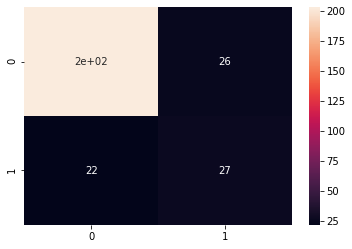

In [73]:
sns.heatmap(confusion_matrix(y_test, y_pred_adb),
           annot = True);

**ROC Curve**

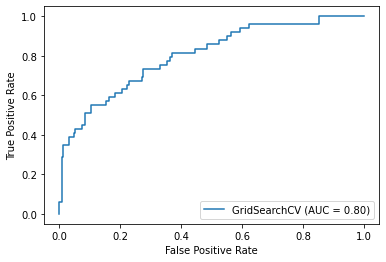

In [77]:
plot_roc_curve( adb_grid, X_test, y_test);

# Saving the model

In [79]:
import joblib
joblib.dump(adb_grid, 'HR-analytics.pkl')

['HR-analytics.pkl']